In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path_to_performances = {
    "task03-liver": "resources/performance_task06_lung.json",
    "task06-lung": "resources/performance_task06_lung.json"
}

In [3]:
with open(path_to_performances["task06-lung"], 'r') as file:
    performance = json.load(file)
performance = pd.DataFrame(performance)

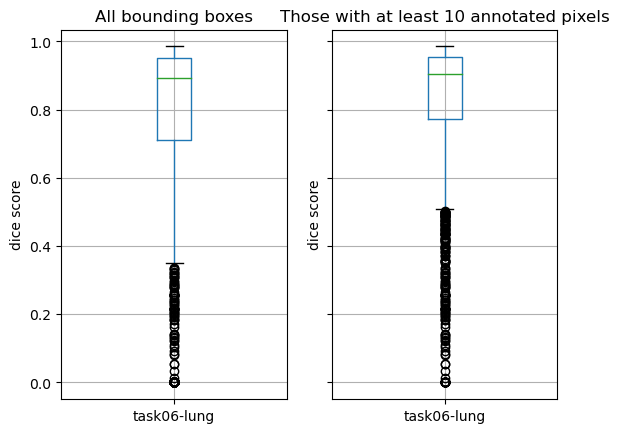

In [47]:
min_pixel_size = 10
performance_filtered = performance[performance['annotated_pixels'] >= min_pixel_size]
_, ax = plt.subplots(1, 2, sharey=True)
performance.boxplot(column='dice_score', ax=ax[0])
performance_filtered.boxplot(column='dice_score', ax=ax[1])
ax[0].set_title('All bounding boxes')
ax[1].set_title(f'Those with at least {min_pixel_size} annotated pixels')
ax[0].set_xticklabels(['task06-lung'])
ax[1].set_xticklabels(['task06-lung'])
ax[0].set_ylabel('dice score')
ax[1].set_ylabel('dice score')
plt.show()

In [19]:
performance.describe()

,slice_id,slice_idx,slice_rows,slice_cols,annotated_pixels,predicted_pixels,dice_score
count,1818.000000,1818.000000,1818.0,1818.0,1818.00000,1818.000000,1818.000000
mean,829.959296,203.673267,512.0,512.0,971.00165,930.841034,0.761044
std,480.569634,96.552369,0.0,0.0,1239.91350,1194.927227,0.291543
min,0.000000,46.000000,512.0,512.0,1.00000,0.000000,0.000000
25%,419.250000,142.250000,512.0,512.0,152.50000,103.250000,0.710672
50%,817.500000,175.000000,512.0,512.0,492.50000,503.500000,0.892737
75%,1246.750000,248.000000,512.0,512.0,1362.75000,1317.000000,0.951360
max,1656.000000,541.000000,512.0,512.0,7223.00000,6860.000000,0.985175


In [20]:
performance_filtered.describe()

,slice_id,slice_idx,slice_rows,slice_cols,annotated_pixels,predicted_pixels,dice_score
count,1708.000000,1708.000000,1708.0,1708.0,1708.000000,1708.000000,1708.000000
mean,830.400468,204.880562,512.0,512.0,1033.399297,990.761710,0.809569
std,479.601011,97.828915,0.0,0.0,1253.821802,1208.505964,0.226555
min,0.000000,46.000000,512.0,512.0,10.000000,0.000000,0.000000
25%,416.750000,143.000000,512.0,512.0,192.000000,156.250000,0.773449
50%,823.500000,174.000000,512.0,512.0,549.500000,559.500000,0.904037
75%,1241.250000,248.250000,512.0,512.0,1451.750000,1393.250000,0.953129
max,1655.000000,541.000000,512.0,512.0,7223.000000,6860.000000,0.985175
